In [1]:
import numpy as np      # To use np.arrays
import pandas as pd     # To use dataframes
from pandas.plotting import autocorrelation_plot as auto_corr

# To plot
import matplotlib.pyplot as plt  
#%matplotlib inline    
import matplotlib as mpl
import seaborn as sns

#For date-time
import math
from datetime import datetime
from datetime import timedelta

import itertools
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose as season
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression 
from sklearn import preprocessing

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
!pip install pmdarima
from pmdarima.utils import decomposed_plot
from pmdarima.arima import decompose
from pmdarima import auto_arima


import warnings
warnings.filterwarnings("ignore")


In [2]:
walmart=pd.read_csv(r'Walmart.csv')

In [3]:
walmart

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[6435 rows x 8 columns]

In [4]:
walmart.shape

(6435, 8)

In [5]:
walmart['Store'].nunique()

45

In [6]:
walmart.describe()

Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000

In [7]:
walmart.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

In [8]:
walmart.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [9]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [10]:
import plotly.express as px
fig = px.histogram(walmart, x='Temperature', y ='Weekly_Sales', nbins=50,color='Holiday_Flag')
fig.show()


In [11]:
fig = px.histogram(walmart, x='Unemployment', y ='Weekly_Sales')

fig.show()

In [12]:
fig = px.histogram(walmart, x='Unemployment', y ='Weekly_Sales', marginal='box', title = 'Unemployment vs Sales', template='simple_white')
fig.show()

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

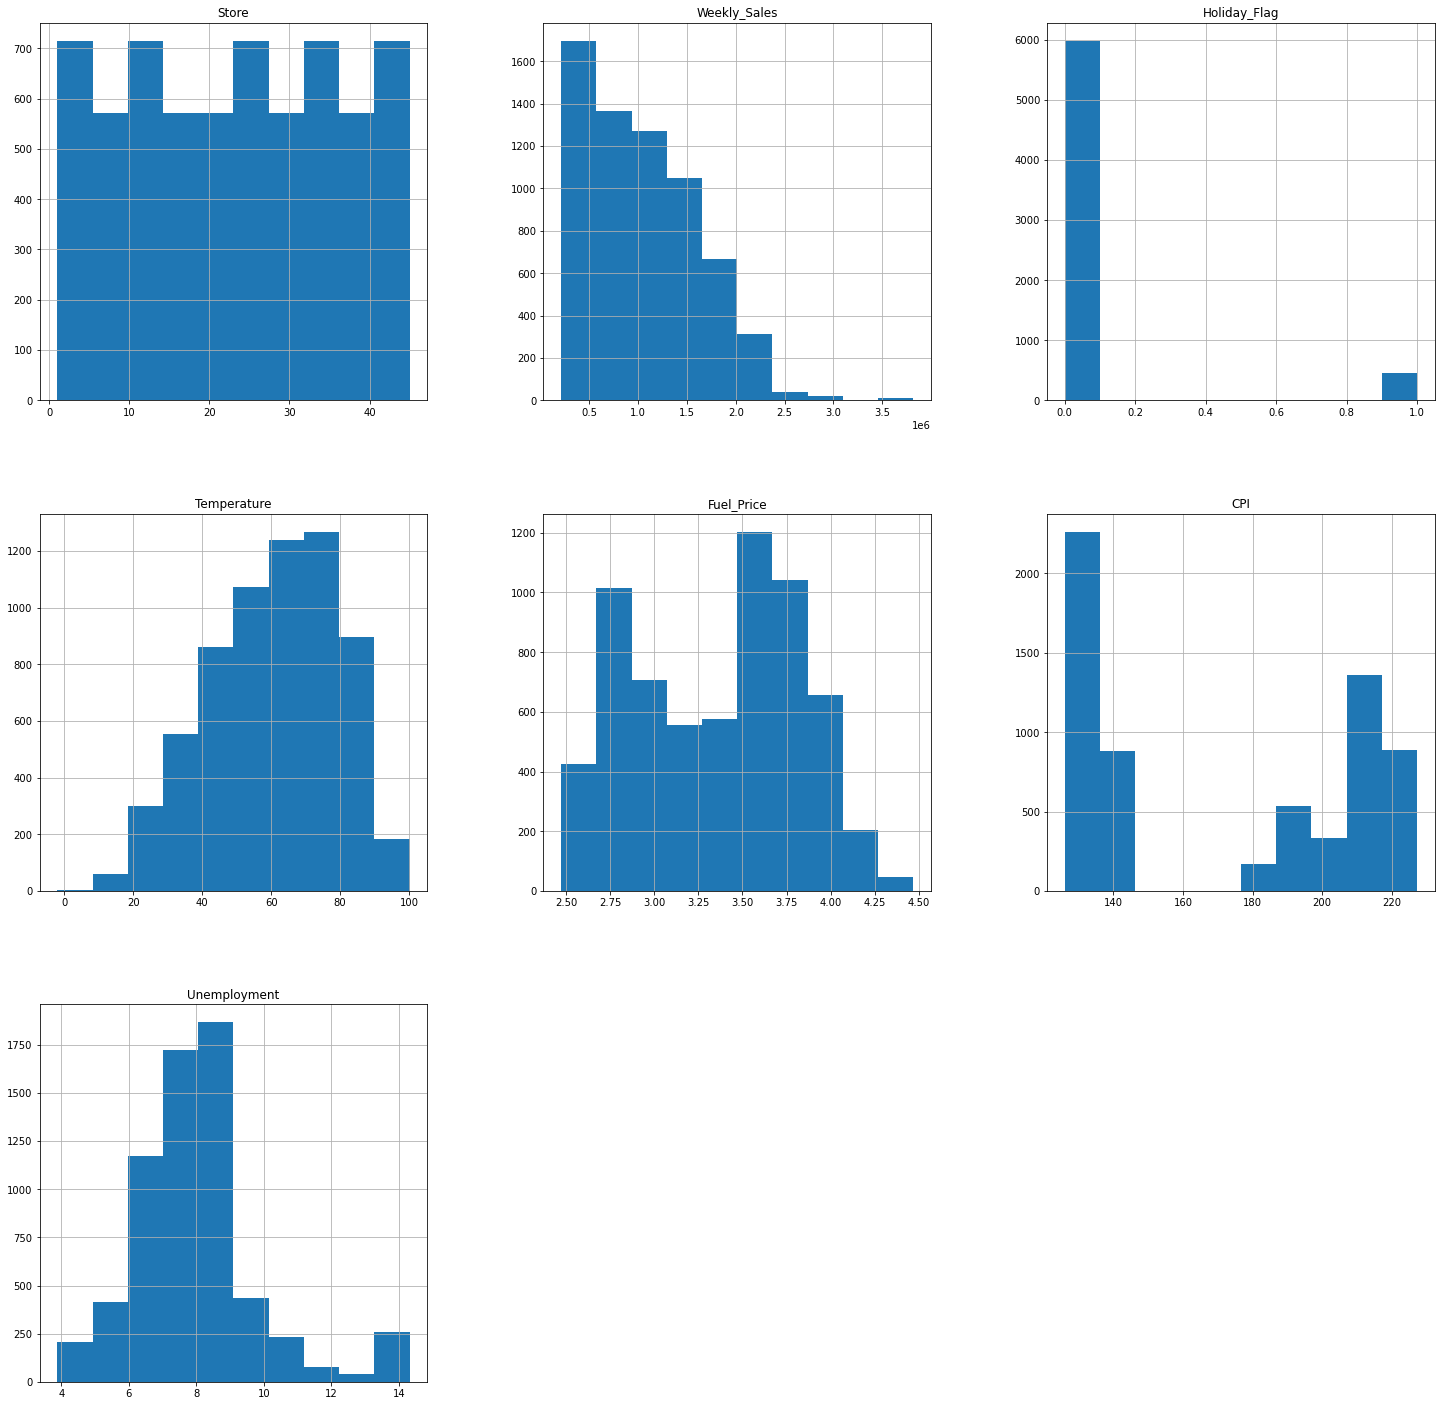

In [13]:
fig = plt.figure(figsize=(25,25))
ax = fig.gca()
walmart.hist(ax=ax)
plt.tight_layout

<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

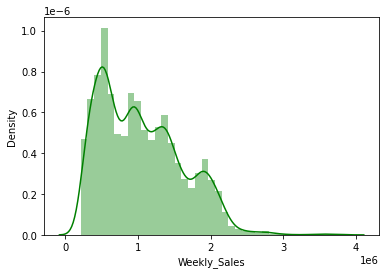

In [14]:
sns.distplot(walmart['Weekly_Sales'],kde=True, color="g")

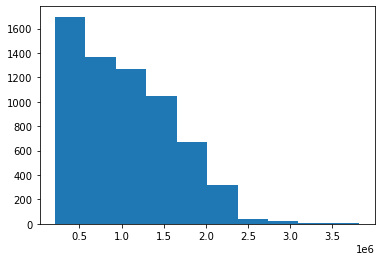

In [15]:
from matplotlib import pyplot as plt

plt.hist(walmart['Weekly_Sales'])
plt.show()

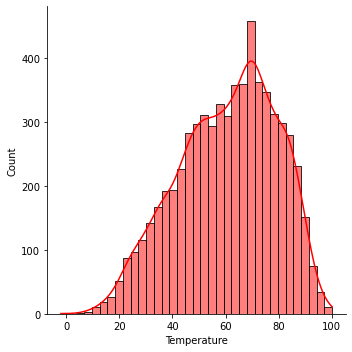

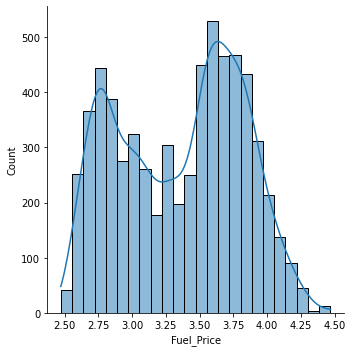

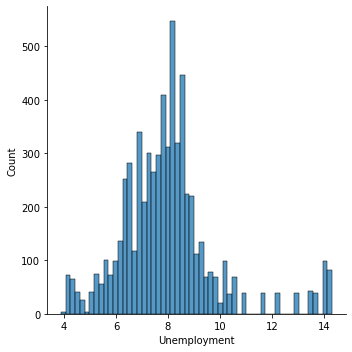

In [16]:
sns.displot(walmart['Temperature'],kde=True,color = 'r')
sns.displot(walmart['Fuel_Price'],kde=True)
sns.displot(walmart['Unemployment'],kde=False)

In [17]:
walmart_holiday = walmart.loc[walmart['Holiday_Flag']==1]
walmart_holiday['Date'].unique() 

array(['12-02-2010', '10-09-2010', '26-11-2010', '31-12-2010',
       '11-02-2011', '09-09-2011', '25-11-2011', '30-12-2011',
       '10-02-2012', '07-09-2012'], dtype=object)

<AxesSubplot:xlabel='Holiday_Flag', ylabel='Weekly_Sales'>

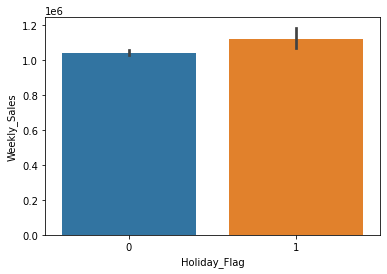

In [18]:
sns.barplot(x='Holiday_Flag', y='Weekly_Sales', data=walmart)


In [19]:
walmart_not_holiday = walmart.loc[walmart['Holiday_Flag']==0]
walmart_not_holiday['Date'].nunique() 

133

In [20]:
# Super bowl dates 
walmart.loc[(walmart['Date'] == '12-02-2010')|(walmart['Date'] == '11-02-2011')|(walmart['Date'] == '10-02-2012'),'Super_Bowl'] = 1
walmart.loc[(walmart['Date'] != '12-02-2010')&(walmart['Date'] != '11-02-2011')&(walmart['Date'] != '10-02-2012'),'Super_Bowl'] = 0

In [21]:
# Labor day dates
walmart.loc[(walmart['Date'] == '10-09-2010')|(walmart['Date'] == '09-09-2011')|(walmart['Date'] == '07-09-2012'),'Labor_Day'] = 1
walmart.loc[(walmart['Date'] != '10-09-2010')&(walmart['Date'] != '09-09-2011')&(walmart['Date'] != '07-09-2012'),'Labor_Day'] = 0

In [22]:
# Thanksgiving dates
walmart.loc[(walmart['Date'] == '26-11-2010')|(walmart['Date'] == '25-11-2011'),'Thanksgiving'] = 1
walmart.loc[(walmart['Date'] != '26-11-2010')&(walmart['Date'] != '25-11-2011'),'Thanksgiving'] = 0

In [23]:
#Christmas dates 
walmart.loc[(walmart['Date'] == '31-12-2010')|(walmart['Date'] == '30-12-2011'),'Christmas'] = 1
walmart.loc[(walmart['Date'] != '31-12-2010')&(walmart['Date'] != '30-12-2011'),'Christmas'] = 0

In [24]:
walmart['Super_Bowl']=walmart['Super_Bowl'].astype(int)
walmart['Labor_Day']=walmart['Labor_Day'].astype(int)
walmart['Thanksgiving']=walmart['Thanksgiving'].astype(int)
walmart['Christmas']=walmart['Christmas'].astype(int)

<AxesSubplot:xlabel='Christmas', ylabel='Weekly_Sales'>

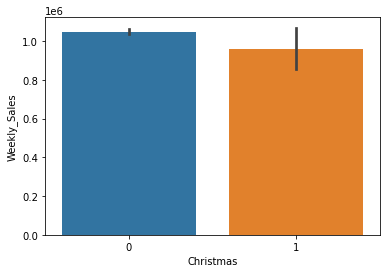

In [25]:
sns.barplot(x='Christmas', y='Weekly_Sales', data=walmart) # Christmas holiday vs not-Christmas

<AxesSubplot:xlabel='Thanksgiving', ylabel='Weekly_Sales'>

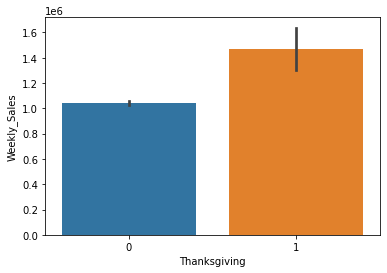

In [26]:
sns.barplot(x='Thanksgiving', y='Weekly_Sales', data=walmart) # Thanksgiving holiday vs not-thanksgiving

<AxesSubplot:xlabel='Super_Bowl', ylabel='Weekly_Sales'>

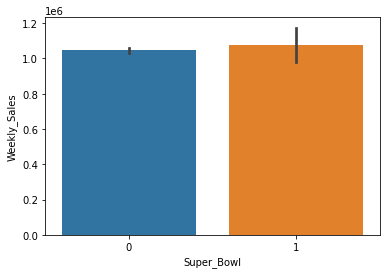

In [27]:
sns.barplot(x='Super_Bowl', y='Weekly_Sales', data=walmart) # Super bowl holiday vs not-super bowl

<AxesSubplot:xlabel='Labor_Day', ylabel='Weekly_Sales'>

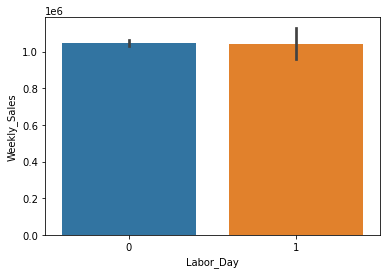

In [28]:
sns.barplot(x='Labor_Day', y='Weekly_Sales', data=walmart) # Labor day holiday vs not-labor day

In [29]:
walmart.describe()

Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment   Super_Bowl    Labor_Day  Thanksgiving  \
count  6435.000000   6435.000000  6435.000000  6435.000000   6435.000000   
mean    171.578394      7.999151     0.020979     0.020979      0.013986   
std      39.356712      1.875885     0.143325     0.143325      0.117442   
min     126.064000      3.879000     0.000000     0.000000      0.000000   
25%     131.735000      6.891000     0.000000     0.000000      0.000000   
50%     182.616521      7.874000     0.000000     0.000000      0.000000   
75%     212.743293      8.622000     0.000000     0.000000      0.000000   
max     227.232807     14.313000     1.000000     1.000000      1.000000   

         Christmas  
count  6435.000000  
mean      0.013986  
std       0.117442  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [30]:
walmart.sort_values(by='Weekly_Sales',ascending=False).head(5)

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
1905     14  24-12-2010    3818686.45             0        30.59       3.141   
2763     20  24-12-2010    3766687.43             0        25.17       3.141   
1333     10  24-12-2010    3749057.69             0        57.06       3.236   
527       4  23-12-2011    3676388.98             0        35.92       3.103   
1762     13  24-12-2010    3595903.20             0        34.90       2.846   

             CPI  Unemployment  Super_Bowl  Labor_Day  Thanksgiving  Christmas  
1905  182.544590         8.724           0          0             0          0  
2763  204.637673         7.484           0          0             0          0  
1333  126.983581         9.003           0          0             0          0  
527   129.984548         5.143           0          0             0          0  
1762  126.983581         7.795           0          0             0          0

In [31]:
walmart.sort_values(by='Weekly_Sales',ascending=False).tail(5)

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
4671     33  02-12-2011     220060.35             0        59.12       3.701   
4623     33  31-12-2010     219804.85             1        52.91       3.148   
4675     33  30-12-2011     215359.21             1        51.60       3.428   
4614     33  29-10-2010     213538.32             0        71.34       3.130   
4619     33  03-12-2010     209986.25             0        52.82       3.041   

             CPI  Unemployment  Super_Bowl  Labor_Day  Thanksgiving  Christmas  
4671  129.845967         8.010           0          0             0          0  
4623  127.087677         9.265           0          0             0          1  
4675  130.071032         8.010           0          0             0          1  
4614  126.436419         9.265           0          0             0          0  
4619  126.731333         9.265           0          0             0          0

# Deeper Look in Sales

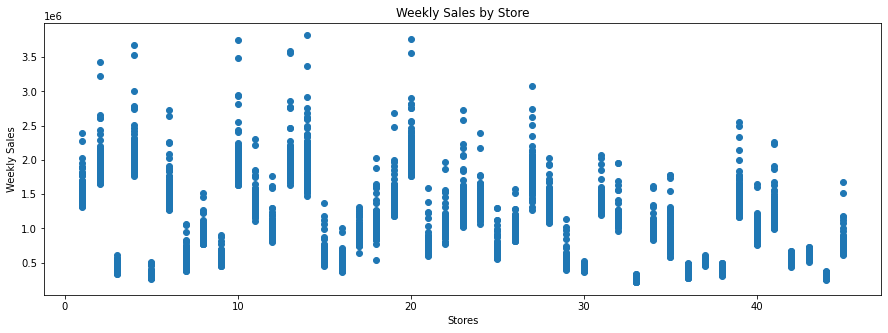

In [32]:
x = walmart['Store']
y = walmart['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Store')
plt.xlabel('Stores')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

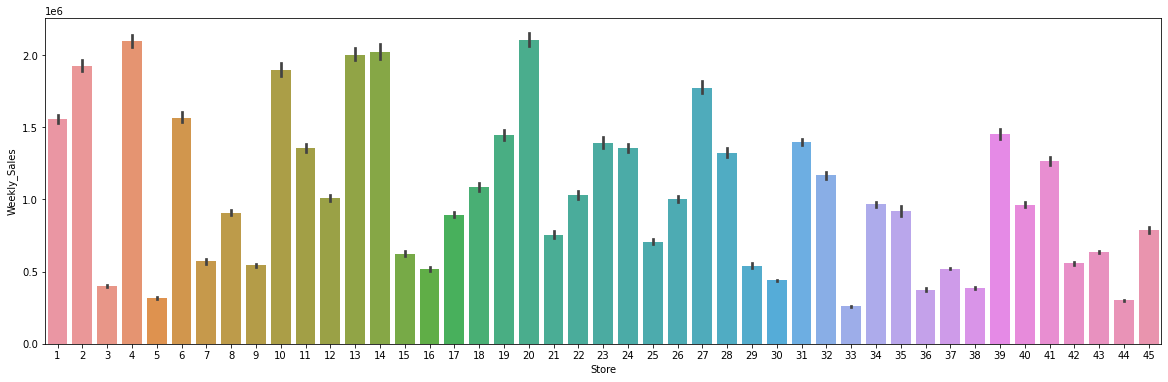

In [33]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='Store', y='Weekly_Sales', data=walmart)

# Changing Date to Datetime and Creating New Columns

In [34]:
df=walmart.copy()

In [35]:
walmart["Date"] = pd.to_datetime(walmart["Date"]) # convert to datetime
df['Day'] =walmart['Date'].dt.day
df['Week'] =walmart['Date'].dt.week
df['Month'] =walmart['Date'].dt.month 
df['Year'] =walmart['Date'].dt.year

In [36]:
df.groupby('Month')['Weekly_Sales'].mean() # to see the best months for sales

Month
1     9.476139e+05
2     1.054597e+06
3     1.024975e+06
4     1.024324e+06
5     1.035379e+06
6     1.064848e+06
7     1.014212e+06
8     1.044874e+06
9     1.009457e+06
10    1.030631e+06
11    1.133751e+06
12    1.210255e+06
Name: Weekly_Sales, dtype: float64

In [37]:
df.groupby('Year')['Weekly_Sales'].mean() # to see the best years for sales

Year
2010    1.059670e+06
2011    1.046239e+06
2012    1.033660e+06
Name: Weekly_Sales, dtype: float64

<AxesSubplot:xlabel='Month'>

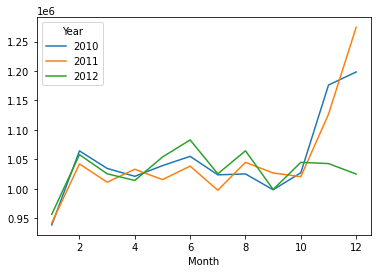

In [38]:
monthly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "Year", index = "Month")
monthly_sales.plot()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

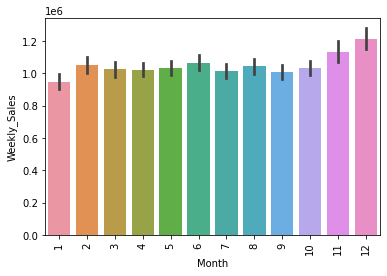

In [39]:
fig = sns.barplot(x='Month', y='Weekly_Sales', data=df)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='Week'>

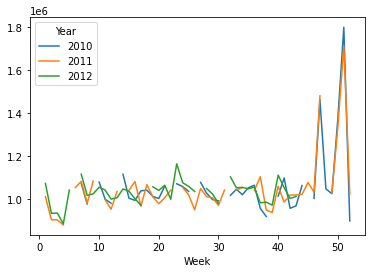

In [40]:
weekly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "Year", index = "Week")
weekly_sales.plot()

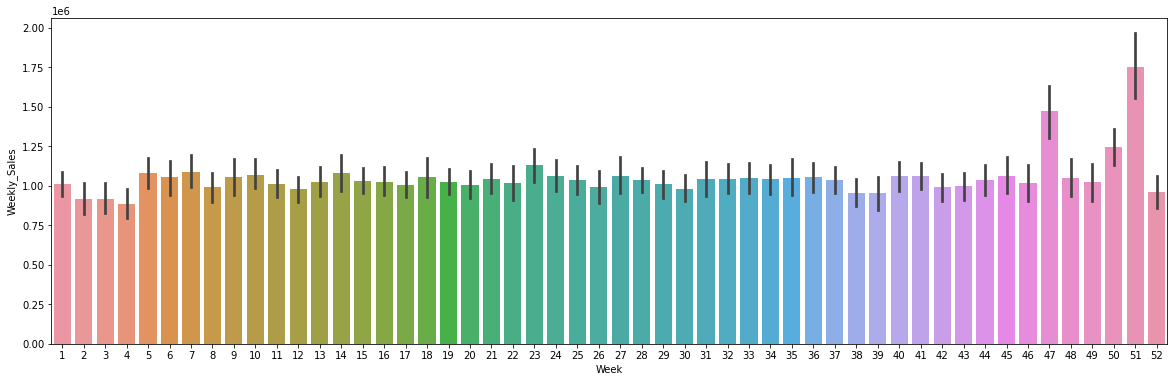

In [41]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='Week', y='Weekly_Sales', data=df)

# Fuel Price, CPI , Unemployment , Temperature Effects

<AxesSubplot:xlabel='Fuel_Price'>

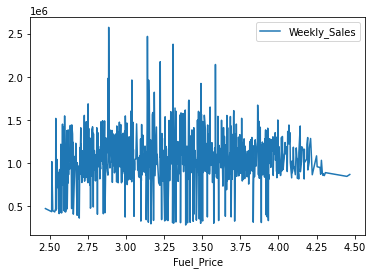

In [42]:
fuel_price = pd.pivot_table(df, values = "Weekly_Sales", index= "Fuel_Price")
fuel_price.plot()

<AxesSubplot:xlabel='Temperature'>

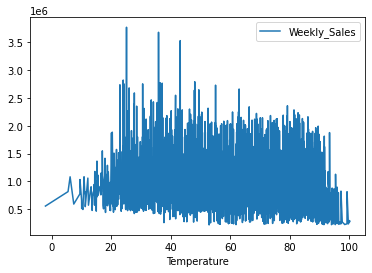

In [43]:
temp = pd.pivot_table(df, values = "Weekly_Sales", index= "Temperature")
temp.plot()

<AxesSubplot:xlabel='CPI'>

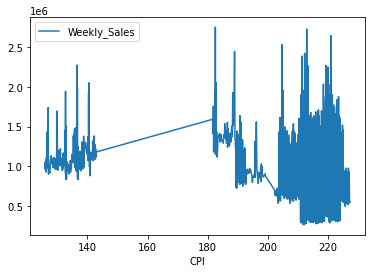

In [44]:
CPI = pd.pivot_table(df, values = "Weekly_Sales", index= "CPI")
CPI.plot()

<AxesSubplot:xlabel='Unemployment'>

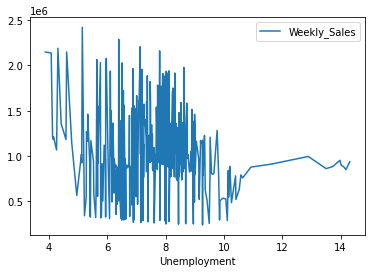

In [45]:
unemployment = pd.pivot_table(df, values = "Weekly_Sales", index= "Unemployment")
unemployment.plot()

Text(0.5, 1.0, 'Annual Sales')

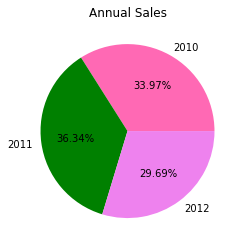

In [46]:
plt.pie(df.groupby('Year')['Weekly_Sales'].sum(),labels=df['Year'].unique(),normalize=True,autopct='%1.2f%%',colors=['hotpink','green','violet'])
plt.title('Annual Sales')

<AxesSubplot:xlabel='Year', ylabel='count'>

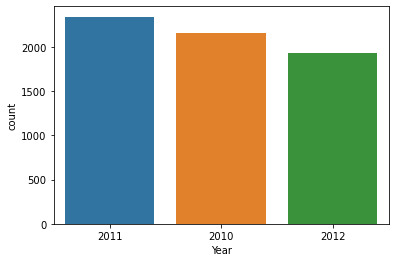

In [47]:
sns.countplot(df['Year'],order=df['Year'].value_counts().index)

<AxesSubplot:xlabel='Day', ylabel='count'>

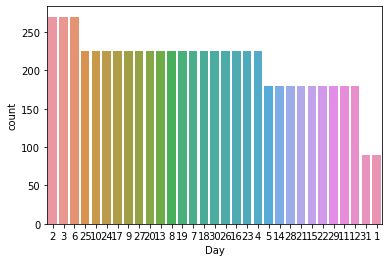

In [48]:
sns.countplot(df['Day'],order=df['Day'].value_counts().index)

<AxesSubplot:xlabel='Month', ylabel='count'>

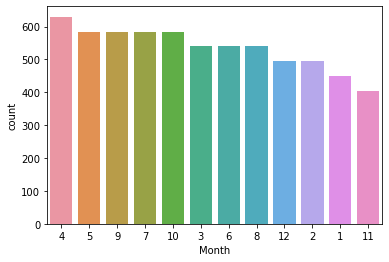

In [49]:
sns.countplot(df['Month'],order= df['Month'].value_counts().index)

([<matplotlib.patches.Wedge at 0x2650a622280>,
 [Text(1.0990796592060845, 0.044987806341685976, '1'),
  Text(1.0744479307766082, 0.2357151756885102, '2'),
  Text(0.9756515765594751, 0.5080393696919666, '3'),
  Text(0.8253338717794777, 0.7272028603446886, '4'),
  Text(0.6639396624540556, 0.8770314273846719, '5'),
  Text(0.4518665957182221, 1.0029040730169687, '6'),
  Text(0.1898146604267204, 1.0834991438331132, '7'),
  Text(-0.05585980657713348, 1.0985807580734177, '8'),
  Text(-0.2936941918488525, 1.0600677910748206, '9'),
  Text(-0.5133108331226955, 0.9728884769586308, '10'),
  Text(-0.6917383975853658, 0.8552765572059313, '11'),
  Text(-0.8381997250132096, 0.7123350482657582, '12'),
  Text(-0.9650573651209635, 0.5278866185326008, '13'),
  Text(-1.0464115848144684, 0.33915010712967925, '14'),
  Text(-1.08811793399974, 0.1612431756947793, '15'),
  Text(-1.0985854650644742, -0.055767158337797565, '16'),
  Text(-1.0571026825397285, -0.30419388318523133, '17'),
  Text(-0.9621287057889217,

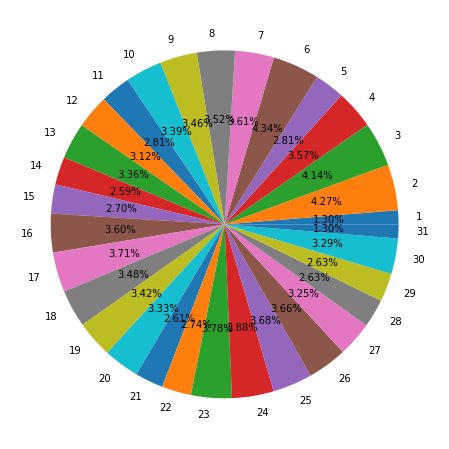

In [50]:
df1 = df.groupby('Day')['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(10,8))
plt.pie(df1['Weekly_Sales'],labels= df1['Day'],autopct='%1.2f%%', normalize=True)

([<matplotlib.patches.Wedge at 0x2650be09cd0>,
 [Text(1.07832507374976, 0.21729020990963835, '1'),
  Text(0.8815747117016126, 0.6578951494639694, '2'),
  Text(0.45672661820515453, 1.000700153004327, '3'),
  Text(-0.14351470417212228, 1.0905977854765654, '4'),
  Text(-0.7205118777472452, 0.8311814687690883, '5'),
  Text(-1.0488917324393079, 0.3314002619499079, '6'),
  Text(-1.0687924176617336, -0.2601591204412919, '7'),
  Text(-0.7831343899201203, -0.7724639327013536, '8'),
  Text(-0.27617782525439555, -1.064765612159668, '9'),
  Text(0.3279344996598599, -1.0499804588338002, '10'),
  Text(0.7875427339163569, -0.7679690373026444, '11'),
  Text(1.0573579944550882, -0.30330524486383986, '12')],
 [Text(0.5881773129544146, 0.11852193267798453, '6.33%'),
  Text(0.480858933655425, 0.35885189970761966, '7.75%'),
  Text(0.24912360993008426, 0.5458364470932692, '8.22%'),
  Text(-0.0782807477302485, 0.5948715193508537, '9.58%'),
  Text(-0.39300647877122463, 0.45337171023768447, '8.99%'),
  Text(-0

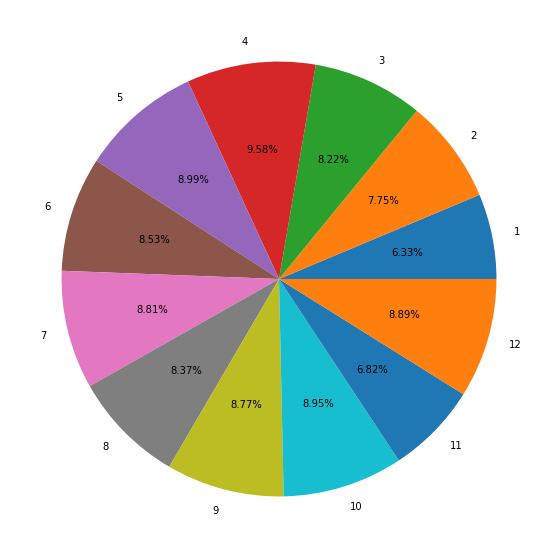

In [51]:
plt.figure(figsize=(10,10))
df2 = df.groupby('Month')['Weekly_Sales'].sum().reset_index()
plt.pie(df2['Weekly_Sales'],labels=df2['Month'],normalize=True,autopct='%1.2f%%')

([<matplotlib.patches.Wedge at 0x2650bcb2df0>,
 [Text(-0.25679386593526243, -1.0696059603508306, 'Non Special Holiday Week'),
  Text(0.3268284610531304, 1.361316699760068, 'Special Holiday Week')],
 [Text(-0.14006938141923403, -0.5834214329186348, '92.50%'),
  Text(0.2101040106770124, 0.8751321641314721, '7.50%')])

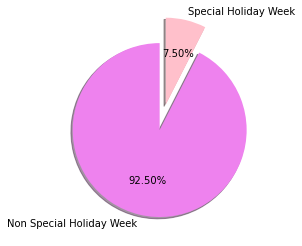

In [52]:
df3 = df.groupby('Holiday_Flag')['Weekly_Sales'].sum().reset_index()
plt.pie(df3['Weekly_Sales'],labels= ['Non Special Holiday Week','Special Holiday Week'],normalize=True,autopct='%1.2f%%',startangle=90,explode=[0,0.3],shadow=True,colors=['violet','pink'])

In [53]:
fig = px.histogram(df, x='Week', y ='Weekly_Sales',marginal='box')
fig.show()

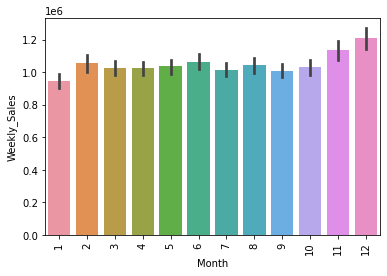

In [54]:
sns.barplot(df["Month"], df["Weekly_Sales"])
plt.xticks(rotation=90)
plt.show()

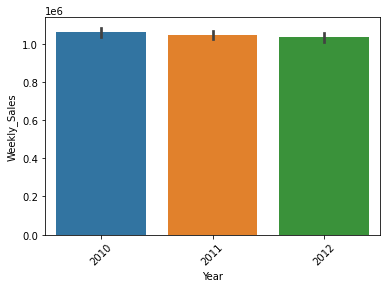

In [55]:
sns.barplot(df["Year"], df["Weekly_Sales"] )
plt.xticks(rotation=45)
plt.show()

# Data Processing for model fit

In [56]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

Text(0.5, 1.0, 'Correlation Matrix')

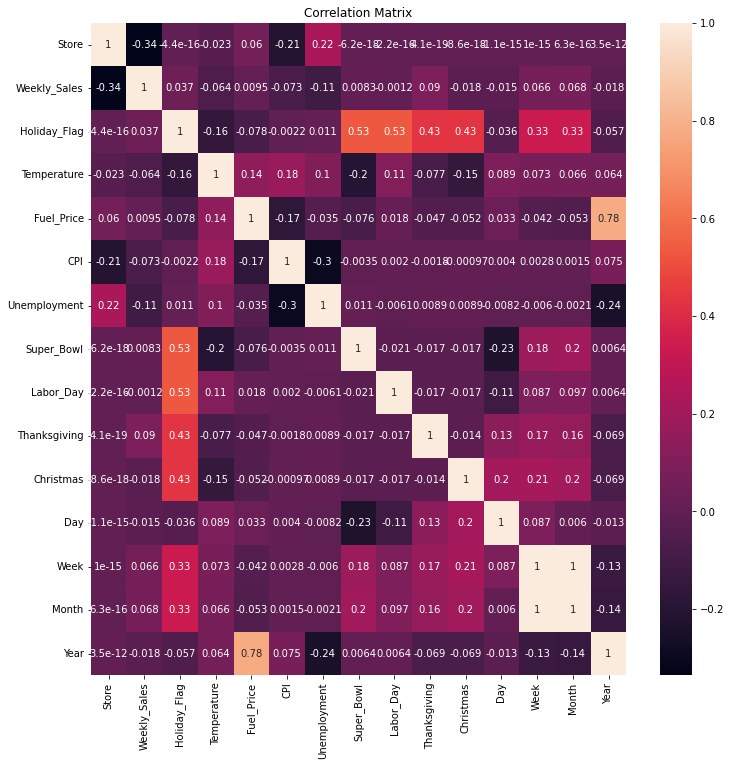

In [57]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Matrix')

In [58]:
#dropping date column as timestamp cannot be used to train the models

X = df.drop(['Weekly_Sales','Date','Super_Bowl','Labor_Day','Thanksgiving','Christmas'],axis=1)
y = df['Weekly_Sales']

In [59]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Holiday_Flag  6435 non-null   int64  
 2   Temperature   6435 non-null   float64
 3   Fuel_Price    6435 non-null   float64
 4   CPI           6435 non-null   float64
 5   Unemployment  6435 non-null   float64
 6   Day           6435 non-null   int64  
 7   Week          6435 non-null   int64  
 8   Month         6435 non-null   int64  
 9   Year          6435 non-null   int64  
dtypes: float64(4), int64(6)
memory usage: 502.9 KB


# ENCODING OF DATA

In [60]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
col = ['Month' , 'Day']
X[col] = encoder.fit_transform(X[col])
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Holiday_Flag  6435 non-null   int64  
 2   Temperature   6435 non-null   float64
 3   Fuel_Price    6435 non-null   float64
 4   CPI           6435 non-null   float64
 5   Unemployment  6435 non-null   float64
 6   Day           6435 non-null   float64
 7   Week          6435 non-null   int64  
 8   Month         6435 non-null   float64
 9   Year          6435 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 502.9 KB


In [61]:
X.fillna(X.median().round(1), inplace=True)

In [62]:
# split for train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [63]:
# one hot encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
transformer = ColumnTransformer(transformers=[('tf',OneHotEncoder(sparse=False,drop='first'),['Store'])],remainder='passthrough')
X_train= transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

In [64]:
# scaling of data in order to reduce time consumption and better fitting
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
rob_scaler = RobustScaler()
rob_scaler.fit(X_train)
X_train = rob_scaler.transform(X_train)
X_test = rob_scaler.transform(X_test)

In [65]:
def pred_model(model,X_train,X_test,y_train,y_test):
    c = model()
    c.fit(X_train,y_train)
    y_pred = c.predict(X_test)
    print(model)
    print(f'MSE: {mean_squared_error(y_test,y_pred)}')
    print(f'MAE: {mean_absolute_error(y_test,y_pred)}')
    print(f'R2 : {r2_score(y_test,y_pred)}')

# predict using various regression models

In [66]:
# Using Linear Regression Model
pred_model(LinearRegression,X_train,X_test,y_train,y_test)

<class 'sklearn.linear_model._base.LinearRegression'>
MSE: 24203843357.21177
MAE: 96063.74340554321
R2 : 0.9248688486387588


In [67]:
# Using Lasso Regression Model
pred_model(Lasso,X_train,X_test,y_train,y_test)

<class 'sklearn.linear_model._coordinate_descent.Lasso'>
MSE: 24163337695.251045
MAE: 95664.94813489441
R2 : 0.9249945822660528


In [68]:
# Using Ridge Regression Model
pred_model(Ridge,X_train,X_test,y_train,y_test)

<class 'sklearn.linear_model._ridge.Ridge'>
MSE: 24346775673.6698
MAE: 95729.93362834533
R2 : 0.9244251724281779


In [69]:
# Using Random Forest Regressor Model
pred_model(RandomForestRegressor,X_train,X_test,y_train,y_test)

<class 'sklearn.ensemble._forest.RandomForestRegressor'>
MSE: 17340408022.251755
MAE: 63851.89535260295
R2 : 0.9461736386011896


In [70]:
# Using ElasticNet Model
pred_model(ElasticNet,X_train,X_test,y_train,y_test)

<class 'sklearn.linear_model._coordinate_descent.ElasticNet'>
MSE: 292852075180.6208
MAE: 455037.0650587719
R2 : 0.09095785895949449


In [71]:
df

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  Super_Bowl  Labor_Day  Thanksgiving  \
0     211.096358         8.106           0          0             0   
1     211.242170         8.106           1          0             0   
2     211.289143         8.106           0          0             0   
3     211.319643         8.106           0          0             0   
4     211.350143         8.106           0          0             0   
...          ...           ...         ...        ...           ...   
6430  192.013558         8.684           0          0             0   
6431  192.170412         8.667           0          0             0   
6432  192.327265         8.667           0          0             0   
6433  192.330854         8.667           0          0             0   
6434  192.308899         8.667           0          0             0   

      Christmas  Day  Week  Month  Year  
0             0    2    17      5  2010  
1             0    2    48     12  2010  
2             0   19     7      2  2010  
3             0   26     8      2  2010  
4             0    3    18      5  2010  
...         ...  ...   ...    ...   ...  
6430          0   28    39      9  2012  
6431          0   10    19      5  2012  
6432          0   10    50     12  2012  
6433          0   19    42     10  2012  
6434          0   26    43     10  2012  

[6435 rows x 16 columns]

In [72]:
df_new=df.copy() #copying to keep my original data not affected by the changes

# Observation of Interactions between Features

In [73]:
drop_col = ['Super_Bowl','Labor_Day','Thanksgiving','Christmas']
df_new.drop(drop_col, axis=1, inplace=True) # dropping columns

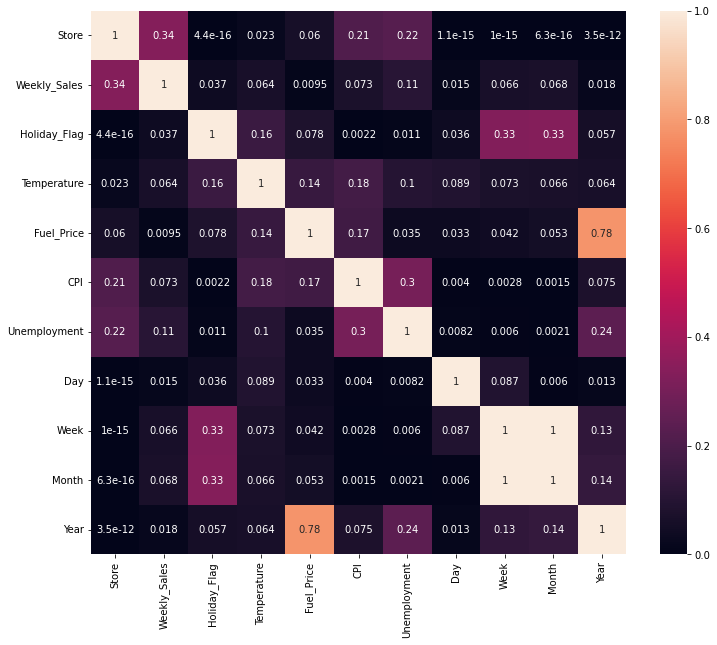

In [74]:
plt.figure(figsize = (12,10))
sns.heatmap(df_new.corr().abs(),annot=True)    # To see the correlations
plt.show()

In [75]:
drop_col = ['Temperature','CPI','Unemployment']
df_new.drop(drop_col, axis=1, inplace=True) # dropping columns

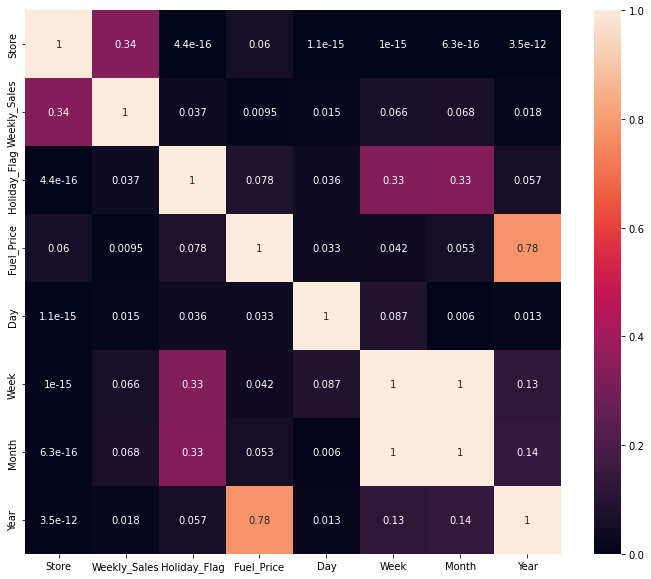

In [76]:
plt.figure(figsize = (12,10))
sns.heatmap(df_new.corr().abs(),annot=True)    # To see the correlations without dropping columns
plt.show()

In [77]:
df_new = df_new.sort_values(by='Date', ascending=True) # sorting according to date

# Time Series Models

In [78]:
df_new.head() # to see my data

Store        Date  Weekly_Sales  Holiday_Flag  Fuel_Price  Day  Week  \
5208     37  01-04-2011     534578.78             0       3.524    4     1   
1204      9  01-04-2011     520962.14             0       3.524    4     1   
1776     13  01-04-2011    1864238.64             0       3.487    4     1   
2634     19  01-04-2011    1305950.22             0       3.811    4     1   
6066     43  01-04-2011     611585.54             0       3.524    4     1   

      Month  Year  
5208      1  2011  
1204      1  2011  
1776      1  2011  
2634      1  2011  
6066      1  2011

In [79]:
df_new["Date"] = pd.to_datetime(df_new["Date"]) #changing data to datetime for decomposing

In [80]:
df_new.set_index('Date', inplace=True) #seting date as index

In [81]:
df_new.head()

Store  Weekly_Sales  Holiday_Flag  Fuel_Price  Day  Week  Month  \
Date                                                                          
2011-01-04     37     534578.78             0       3.524    4     1      1   
2011-01-04      9     520962.14             0       3.524    4     1      1   
2011-01-04     13    1864238.64             0       3.487    4     1      1   
2011-01-04     19    1305950.22             0       3.811    4     1      1   
2011-01-04     43     611585.54             0       3.524    4     1      1   

            Year  
Date              
2011-01-04  2011  
2011-01-04  2011  
2011-01-04  2011  
2011-01-04  2011  
2011-01-04  2011

In [82]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6435 entries, 2011-01-04 to 2010-12-31
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Fuel_Price    6435 non-null   float64
 4   Day           6435 non-null   int64  
 5   Week          6435 non-null   int64  
 6   Month         6435 non-null   int64  
 7   Year          6435 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 452.5 KB


# Plotting Sales

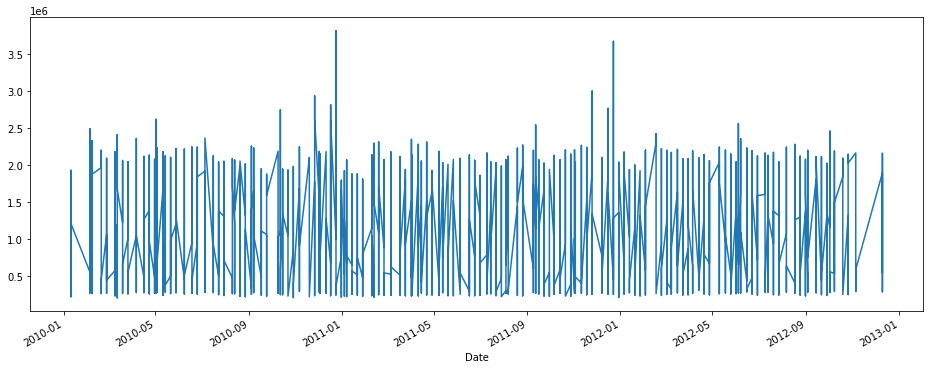

In [83]:
plt.figure(figsize=(16,6))
df_new['Weekly_Sales'].plot()
plt.show()

In [84]:
df_new.isnull().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Fuel_Price      0
Day             0
Week            0
Month           0
Year            0
dtype: int64

In [85]:
df_week = df_new.resample('W').mean().interpolate() #resample data as weekly

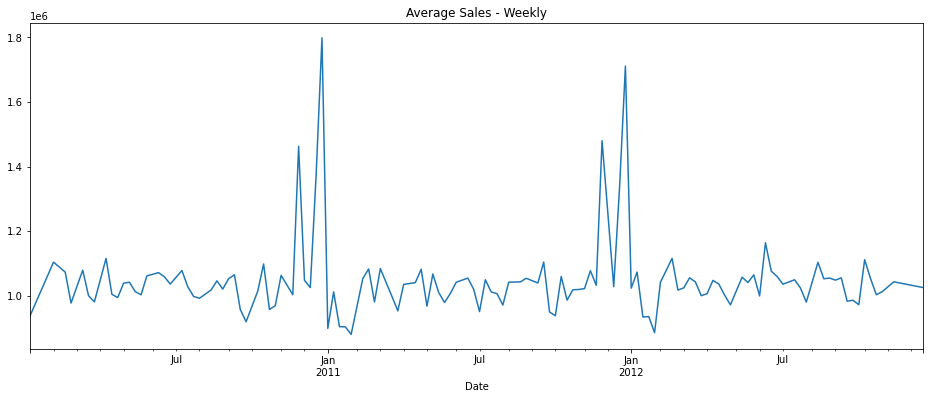

In [86]:
plt.figure(figsize=(16,6))
df_week['Weekly_Sales'].plot()
plt.title('Average Sales - Weekly')
plt.show()

In [87]:
df_month = df_new.resample('MS').mean().interpolate()# resampling as monthly

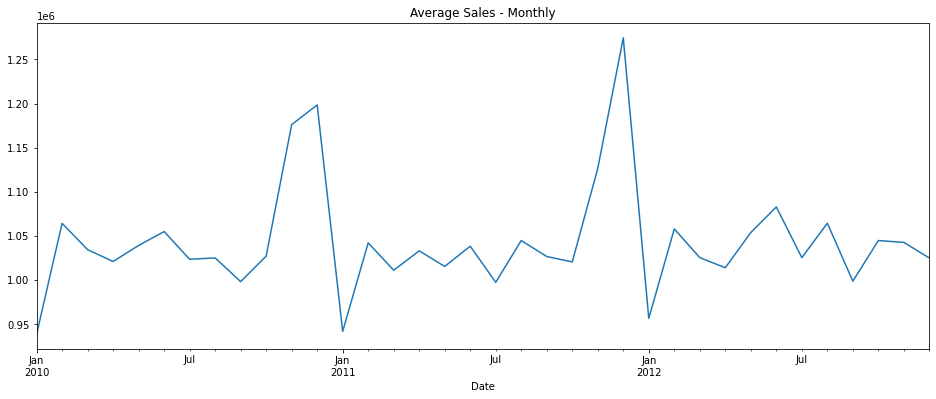

In [88]:
plt.figure(figsize=(16,6))
df_month['Weekly_Sales'].plot()
plt.title('Average Sales - Monthly')
plt.show()

# To Observe 2-weeks Rolling Mean and Std

In [89]:
# finding 2-weeks rolling mean and std
roll_mean = df_week['Weekly_Sales'].rolling(window=2, center=False).mean()
roll_std = df_week['Weekly_Sales'].rolling(window=2, center=False).std()

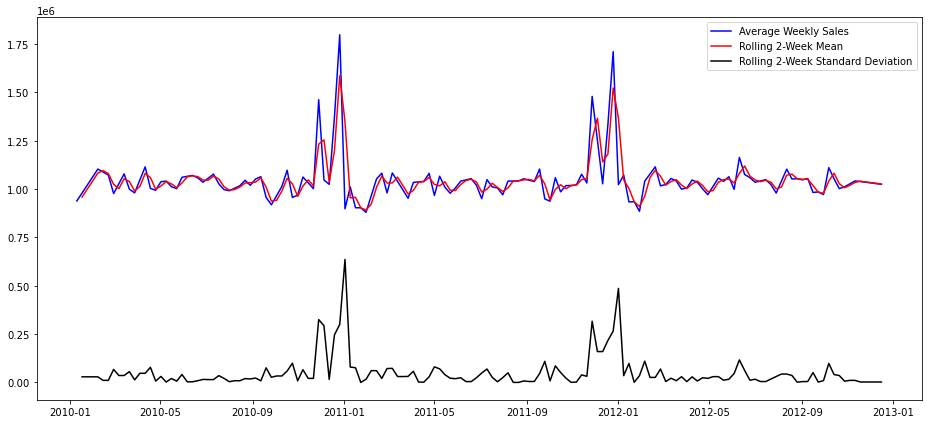

In [90]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week['Weekly_Sales'], color='blue',label='Average Weekly Sales')
ax.plot(roll_mean, color='red', label='Rolling 2-Week Mean')
ax.plot(roll_std, color='black', label='Rolling 2-Week Standard Deviation')
ax.legend()
fig.tight_layout()

# Adfuller Test to Make Sure

In [91]:
adfuller(df_week['Weekly_Sales'])

(-5.796635741194235,
 4.735200401890382e-07,
 4,
 149,
 {'1%': -3.4750180242954167,
  '5%': -2.8811408028842043,
  '10%': -2.577221358046935},
 3626.927917849009)

# Train - Test Split of Weekly Data

In [92]:
train_data = df_week[:int(0.7*(len(df_week)))] 
test_data = df_week[int(0.7*(len(df_week))):]

print('Train:', train_data.shape)
print('Test:', test_data.shape)

Train: (107, 8)
Test: (47, 8)


In [93]:
target = "Weekly_Sales"
used_cols = [c for c in df_week.columns.to_list() if c not in [target]] # all columns except price

# assigning train-test X-y values

X_train = train_data[used_cols]
X_test = test_data[used_cols]
y_train = train_data[target]
y_test = test_data[target]

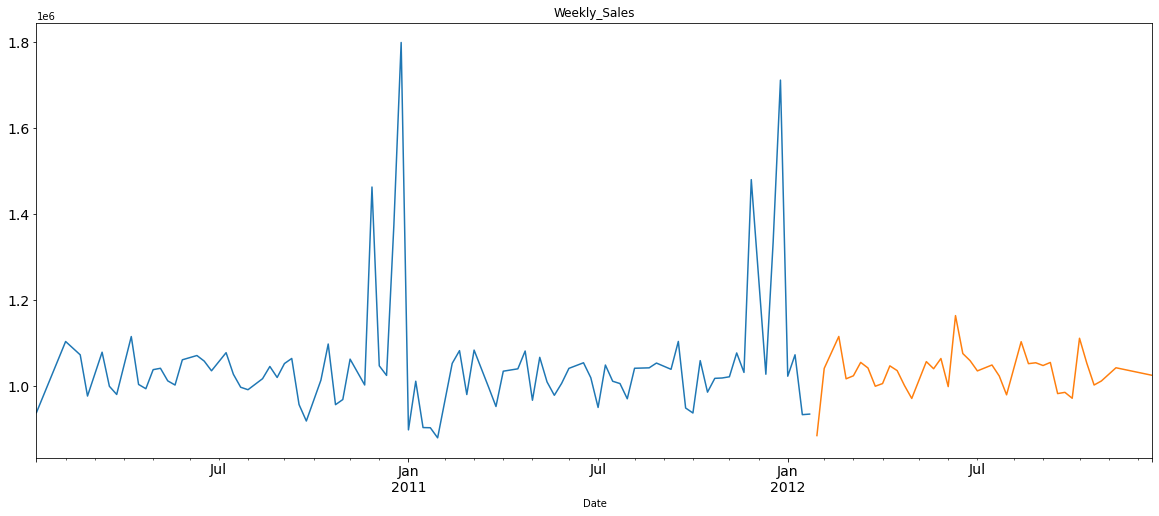

In [94]:
train_data['Weekly_Sales'].plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
test_data['Weekly_Sales'].plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
plt.show()


# Decomposing Weekly Data to Observe Seasonality

In [95]:
decomposed = decompose(df_week['Weekly_Sales'].values, 'additive', m=20) #decomposing of weekly data 

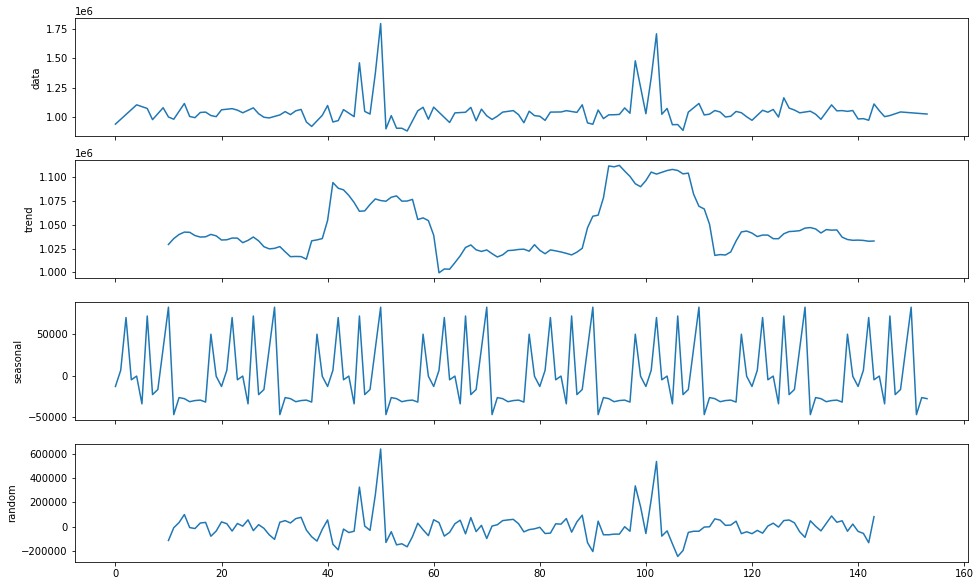

In [96]:
decomposed_plot(decomposed, figure_kwargs={'figsize': (16, 10)})
plt.show()

# Trying To Make Data More Stationary

# 1. Difference

In [97]:
df_week_diff = df_week['Weekly_Sales'].diff().dropna() #creating difference values

In [98]:
# taking mean and std of differenced data
diff_roll_mean = df_week_diff.rolling(window=2, center=False).mean()
diff_roll_std = df_week_diff.rolling(window=2, center=False).std()

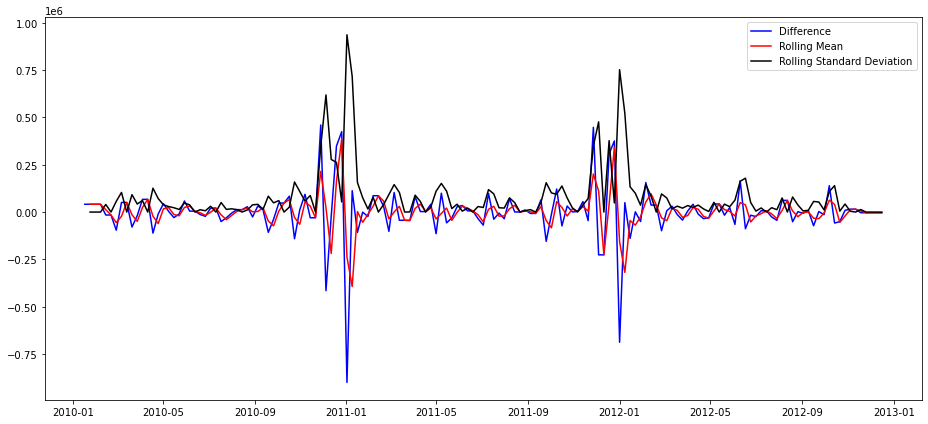

In [99]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week_diff, color='blue',label='Difference')
ax.plot(diff_roll_mean, color='red', label='Rolling Mean')
ax.plot(diff_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

# 2.Shift

In [100]:
df_week_lag = df_week['Weekly_Sales'].shift().dropna() #shifting the data 

In [101]:
lag_roll_mean = df_week_lag.rolling(window=2, center=False).mean() 
lag_roll_std = df_week_lag.rolling(window=2, center=False).std()

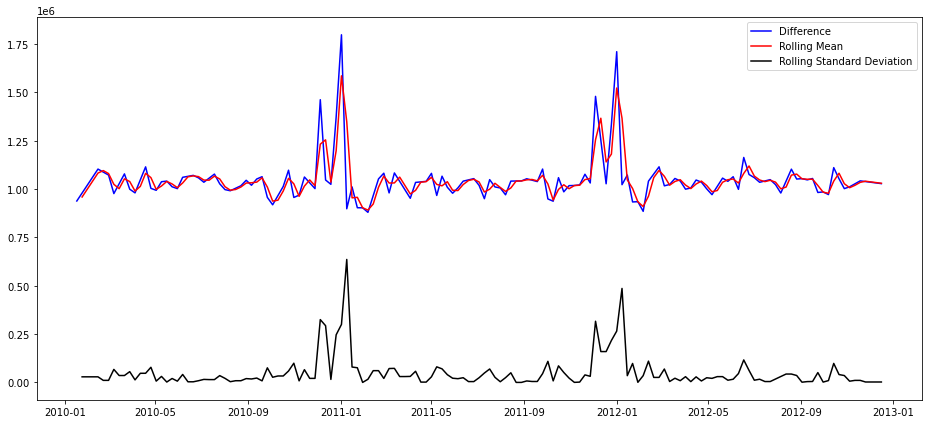

In [102]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week_lag, color='blue',label='Difference')
ax.plot(lag_roll_mean, color='red', label='Rolling Mean')
ax.plot(lag_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

# 3.Log

In [103]:
logged_week = np.log1p(df_week['Weekly_Sales']).dropna() #taking log of data

In [104]:
log_roll_mean = logged_week.rolling(window=2, center=False).mean()
log_roll_std = logged_week.rolling(window=2, center=False).std()

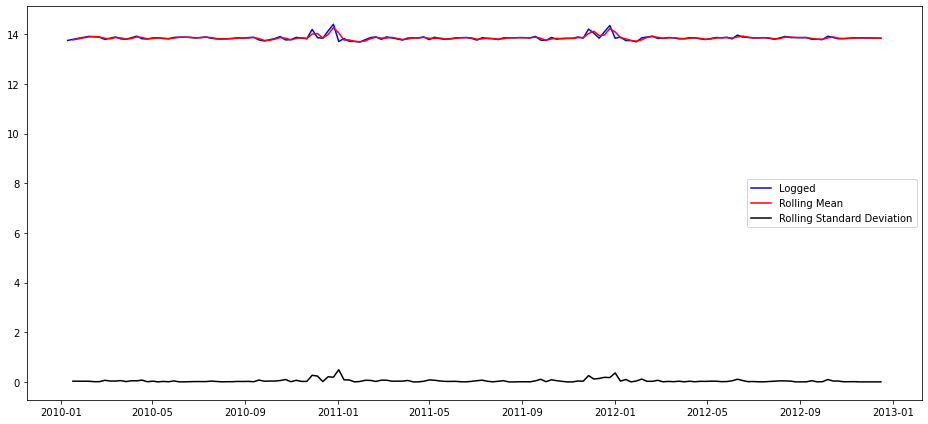

In [105]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(logged_week, color='blue',label='Logged')
ax.plot(log_roll_mean, color='red', label='Rolling Mean')
ax.plot(log_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

# Auto-ARIMA MODEL

# Train-Test Split

In [106]:
train_data_diff = df_week_diff [:int(0.7*(len(df_week_diff )))]
test_data_diff = df_week_diff [int(0.7*(len(df_week_diff ))):]

In [107]:
# train_data = train_data['Weekly_Sales']
# test_data = test_data['Weekly_Sales']

model_auto_arima = auto_arima(train_data_diff, trace=True,start_p=0, start_q=0, start_P=0, start_Q=0,
                  max_p=20, max_q=20, max_P=20, max_Q=20, seasonal=True,maxiter=200,
                  information_criterion='aic',stepwise=False, suppress_warnings=True, D=1, max_D=10,
                  error_action='ignore',approximation = False)
model_auto_arima.fit(train_data_diff)

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=2875.692, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=2845.007, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=2845.262, Time=0.04 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=2846.540, Time=0.06 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=2847.792, Time=0.07 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=2834.610, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=2865.113, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=2842.448, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=2844.948, Time=0.12 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=2840.468, Time=0.11 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=2838.617, Time=0.17 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=2847.461, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=2845.185, Time=0.09 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=2846.760, Time=0.14 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=2834.805, Time=0.30 sec
 ARIMA(3,0

ARIMA(maxiter=200, order=(0, 0, 5), scoring_args={},
      seasonal_order=(0, 0, 0, 1), suppress_warnings=True)

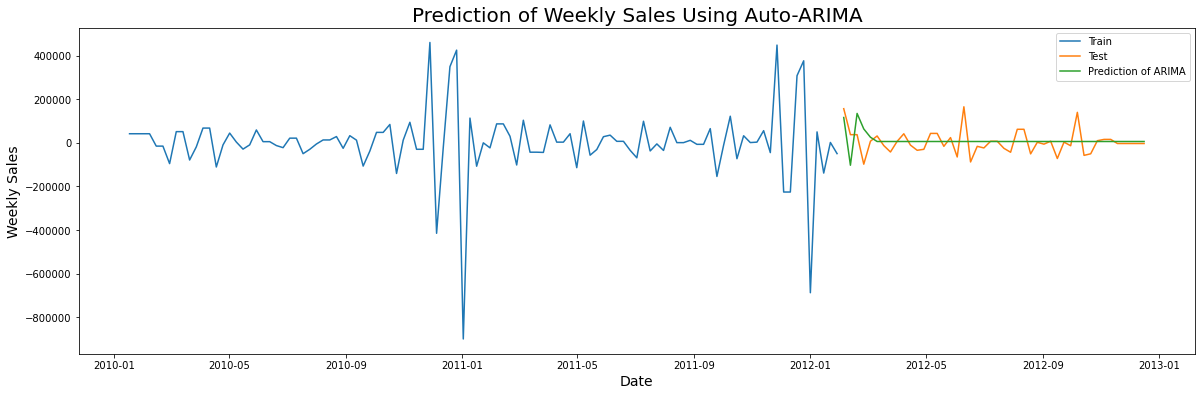

In [108]:
y_pred = model_auto_arima.predict(n_periods=len(test_data_diff))
y_pred = pd.DataFrame(y_pred,index = test_data.index,columns=['Prediction'])
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales Using Auto-ARIMA', fontsize=20)
plt.plot(train_data_diff, label='Train')
plt.plot(test_data_diff, label='Test')
plt.plot(y_pred, label='Prediction of ARIMA')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

# ExponentialSmoothing

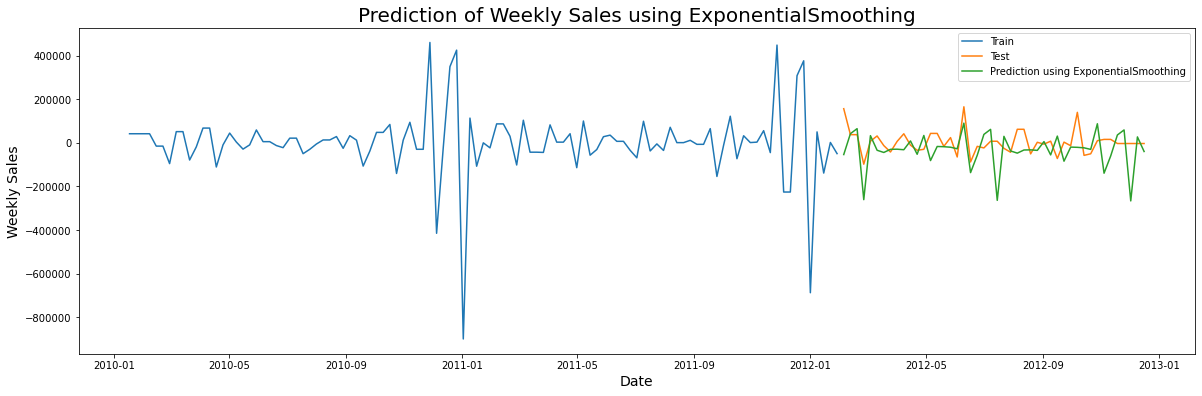

In [109]:
model_holt_winters = ExponentialSmoothing(train_data_diff, seasonal_periods=20, seasonal='additive',
                                           trend='additive',damped=True).fit() #Taking additive trend and seasonality.
y_pred = model_holt_winters.forecast(len(test_data_diff))# Predict the test data

#Visualize train, test and predicted data.
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales using ExponentialSmoothing', fontsize=20)
plt.plot(train_data_diff, label='Train')
plt.plot(test_data_diff, label='Test')
plt.plot(y_pred, label='Prediction using ExponentialSmoothing')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

In [110]:
def wmae_test(test, pred): # WMAE for test 
    weights = X_test['Holiday_Flag'].apply(lambda Holiday_Flag:5 if Holiday_Flag else 1)
    error = np.sum(weights * np.abs(test - pred), axis=0) / np.sum(weights)
    return error

In [111]:
wmae_test(test_data_diff, y_pred)

85793.04613372839